In [ ]:
!nvidia-smi

Sun Apr 16 13:27:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           6945        260  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36            676         24  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           2631         67  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle datasets download -d masoudnickparvar/white-blood-cells-dataset

100% 497M/499M [00:21<00:00, 23.3MB/s]
100% 499M/499M [00:21<00:00, 24.6MB/s]


In [ ]:
!unzip /content/white-blood-cells-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Neutrophil/95-8-1-1_253_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_256_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_257_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_259_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_25_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_265_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_268_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_269_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_270_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_274_3.jpg  
  inflating: Train/Neutrophil/95-8-1-1_275_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_276_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_276_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_281_3.jpg  
  inflating: Train/Neutrophil/95-8-1-1_281_4.jpg  
  inflating: Train/Neutrophil/95-8-1-1_282_1.jpg  
  inflating: Train/Neutrophil/95-8-1-1_283_2.jpg  
  inflating: Train/Neutrophil/95-8-1-1_285_2.jpg  
  inflating: Train/Neutrophil/95

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import os
import random

#importing library for data visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#importing tensorflow for model creation
import tensorflow
import tensorflow as tf
from keras.models import Sequential

#Generate batches of tensor image data with real time data augmentation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

#for enabling inline plotting
%matplotlib inline

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TrainingImagePath='/content/drive/MyDrive/FYP/archive/train/Train'
# TestingImagePath='/content/drive/MyDrive/FYP/archive/TestA/TestA'
# ValidationImagePath='/content/drive/MyDrive/FYP/archive/TestA/TestA'
TrainingImagePath='/content/drive/MyDrive/FYP/WBC/archive/train/Train'
TestingImagePath='/content/drive/MyDrive/FYP/WBC/archive/TestA/TestA'
ValidationImagePath='/content/drive/MyDrive/FYP/WBC/archive/TestA/TestA'

**NOTE:** The /TestB/Test-B folder contains only two classes or folder "Neutrophil and lymphocytes" so this can't work as validation dataset.

In [ ]:
#Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
    rescale=1./255)
    # shear_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True)

#Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./225)

In [ ]:
#Generating the Training Data
training_set = train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical')

#Generating the Testing Data
test_set = test_datagen.flow_from_directory(
    TestingImagePath,
    target_size=(128,128),
    batch_size=64,
    class_mode= 'categorical')

#Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
    ValidationImagePath,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical'
)

Found 10187 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10175 files belonging to 5 classes.
Using 8140 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10175 files belonging to 5 classes.
Using 2035 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  # tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64800)             0

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
255/255 [==============================] - 32s 38ms/step - loss: 0.6631 - accuracy: 0.7806 - val_loss: 0.3109 - val_accuracy: 0.8993
Epoch 2/5
255/255 [==============================] - 4s 17ms/step - loss: 0.2740 - accuracy: 0.9034 - val_loss: 0.2691 - val_accuracy: 0.9037
Epoch 3/5
255/255 [==============================] - 4s 16ms/step - loss: 0.1979 - accuracy: 0.9335 - val_loss: 0.3059 - val_accuracy: 0.8929
Epoch 4/5
255/255 [==============================] - 4s 17ms/step - loss: 0.1452 - accuracy: 0.9522 - val_loss: 0.1918 - val_accuracy: 0.9342
Epoch 5/5
255/255 [==============================] - 4s 16ms/step - loss: 0.0982 - accuracy: 0.9695 - val_loss: 0.1840 - val_accuracy: 0.9396


In [ ]:
model_history = history

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

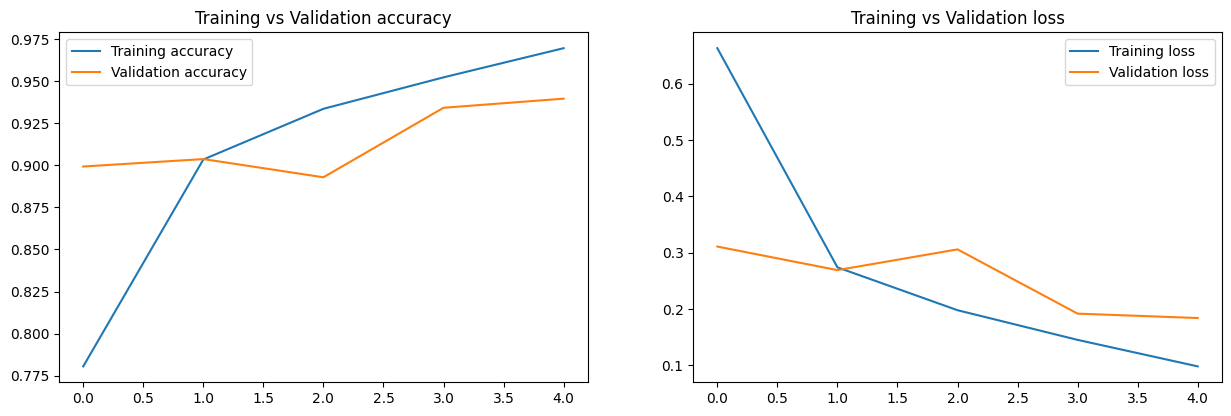

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.title("Training vs Validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend()
plt.title("Training vs Validation loss")
plt.show()

**Saving the model**

In [ ]:
##saving the model
model.save("/content/drive/MyDrive/FYP/archive/train/Train/model.pk1")

**Testing the model on a diff image**

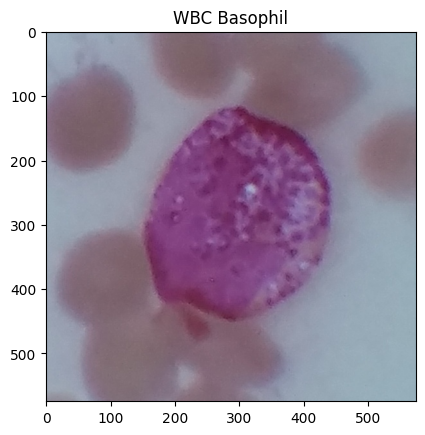

In [ ]:
'''###making simple prediction###'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/Test-A/Basophil/20190526_163027_0.jpg"
test_image=load_img(testImage,target_size=(180,180))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result= model.predict(test_image, verbose=0)

img =cv2.imread(testImage)
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title(f'WBC {class_names[np.argmax(result)]}')
plt.show()


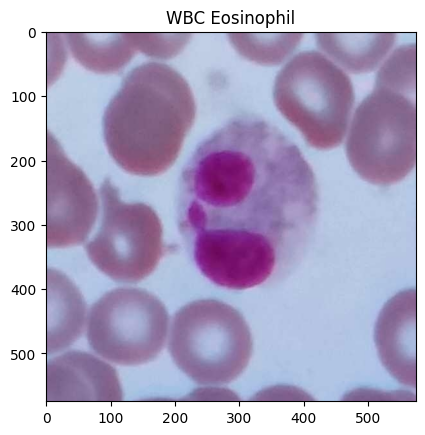

In [ ]:
'''###making single prediction###'''
testImage="/content/Test-A/Eosinophil/95-8-27-1_100_2.jpg"
test_image=load_img(testImage, target_size=(180,180))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image, axis=0)
result= model.predict(test_image, verbose=0)

img=cv2.imread(testImage)
#gray=

plt.imshow(img)
plt.title(f'WBC {class_names[np.argmax(result)]}')
plt.show()

#print('Prediction is:', ResultMap[np.argmax(result)])

In [ ]:
#Function to plot any randome image from dataset
def showImages(class_name) :
    
    folder_path = os.path.join(TrainingImagePath, class_name)
    
    try:
       image_path = random.choice(os.listdir(folder_path))
       plt.imshow(mpimg.imread(os.path.join(folder_path, image_path)))
    except:
       print('Image path is not correct!')
       
    plt.title(class_name)
    plt.axis(False)

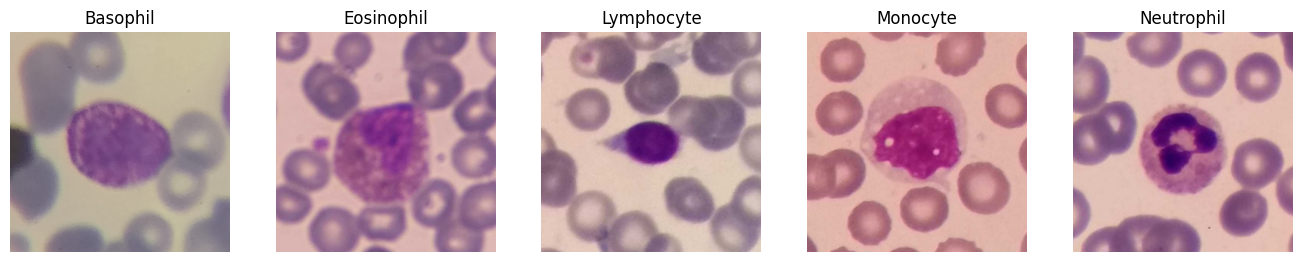

In [ ]:
plt.figure(figsize = (20,20))
for labels, number in training_set.class_indices.items():  
    plt.subplot(6,6,number+1)
    showImages(labels)

In [ ]:
#printing class labels
test_set.class_indices

{'Basophil': 0,
 'Eosinophil': 1,
 'Lymphocyte': 2,
 'Monocyte': 3,
 'Neutrophil': 4}

**Create CNN model**

In [ ]:
'''###Create deep learning CNN model ###'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
''' initializing the CNN'''
classifier = Sequential()

'''STEP--1 Convolution
#Add first layer of CNN
#we are using format (64,64,3) beacuse we are using Tensorflow backend
It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3,3), strides=(1,1), input_shape= (128,128,3), activation='relu'))

'''# STEP--2 Max Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''####ADDITIONAL LAYER of CONVOLUTION for better accuracy###'''
classifier.add(Convolution2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

'''#STEP--3 Flattening'''
classifier.add(Flatten())

'''#STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(5, activation='relu'))

#classifier.add(Dense(OutputNeurons, activation='softmax'))

'''#Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [ ]:

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 5)                 2